## kmeans

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
# from scipy.misc import imread
import imageio
from scipy.spatial.distance import cdist

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2

## kmeans

C:\Users\MPLAB\AppData\Local\Temp\ipykernel_5592\3187280593.py:137: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)


做了 54 的次數


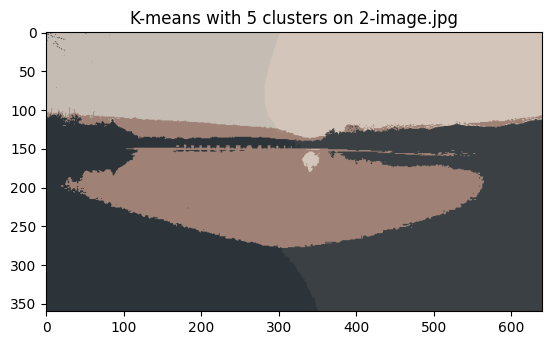

做了 50 的次數


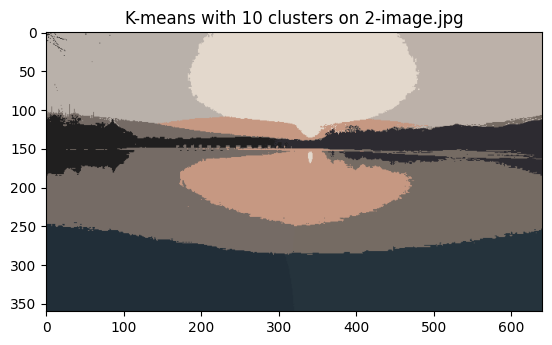

做了 159 的次數


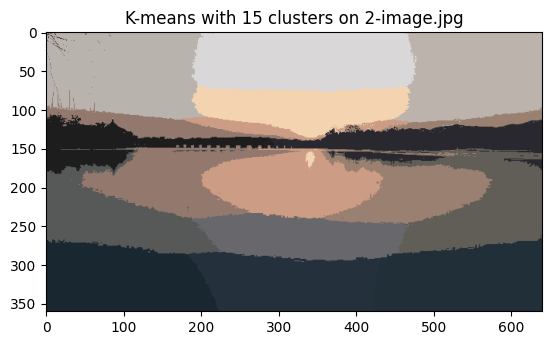

做了 50 的次數


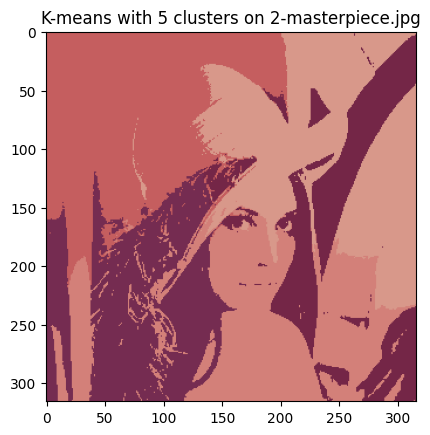

做了 104 的次數


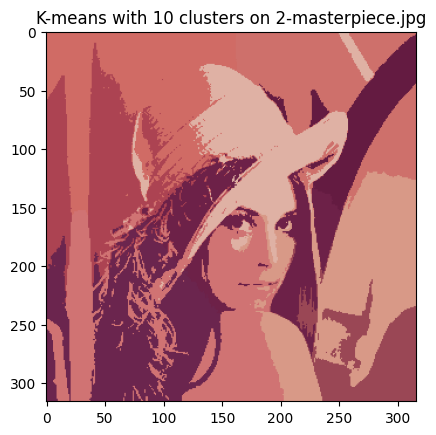

做了 161 的次數


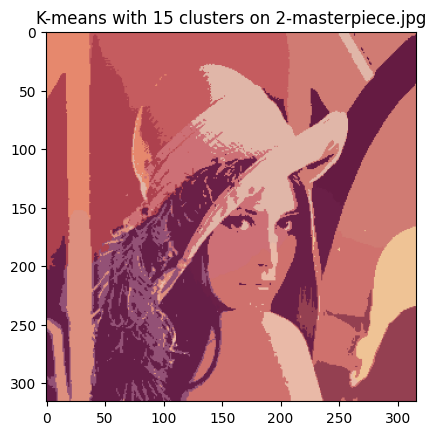

In [4]:

'''
KMEANS_SEGMENTATION: Image segmentation using kmeans
Arguments:
    im - the image being segmented, given as a (H, W, 3) ndarray

    features - ndarray of size (#pixels, M) that are the feature vectors
        associated with each pixel. The #pixels are arranged in such a way
        that calling reshape((H,W)) will correspond to the image im.

    num_clusters - The parameter "K" in K-means that tells the number of
        clusters we will be using.

Returns:
    pixel_clusters - H by W matrix where each index tells what cluster the
        pixel belongs to. The clusters must range from 0 to N-1, where N is
        the total number of clusters.

The K-means algorithm can be done in the following steps:
(1) Randomly choose the initial centroids from the features
(2) Repeat until convergence:
    - Assign each feature vector to its nearest centroid
    - Compute the new centroids as the average of all features assigned to it
    - Convergence happens when the centroids do not change
'''
"""
parameter:
    pixel_clusters  ,what cluster the pixel belongs
    num_clusters , number of clusters
    features ,size (h*w,) -> 存 (row ,col ,img R,img G ,img B)

Returns:
    返回 pixel_clusters 表示每一個點屬於哪一個clusters


註解 :
    平均值是我們的新質心

    np.random.choice
    從M也就是存著每一個pixel的M矩陣,隨機挑一個數字,replzce=false不能挑同一個點

    idx_random 當 cluster

    np.argsort, 返回從小到大的 值 在哪一個index 

    np.linalg.norm, axis=1 行處理, 默認 ord = None, 默认情况下, 是求整体的矩阵元素平方和, 再开根号。

    idx[0] 選最小 放進 pixel_clusters,知道最小平方norm 在哪一個中心點 


    candidate = np.where(pixel_clusters == j)[0] : -> 取最小的
    candidate 存 在該cluster的 index



"""
def kmeans_segmentation(im, features, num_clusters):

    #initialization
    times=0
    h,w,_ = im.shape
    pixel_clusters = np.zeros((h*w),dtype=int)
    M  = features.shape[0]

    # randomly choose
    idx_random = np.random.choice(M, num_clusters, replace=False) 
    centroids = features[idx_random]
    

    new_centriods = np.zeros_like(centroids)
    while True:
        # 
        for i in range(features.shape[0]):
            idx = np.argsort(np.linalg.norm(features[i] - centroids,axis=1)) #new_centriods
            pixel_clusters[i] = idx[0]

        for j in range(num_clusters):
           
            candidate = np.where(pixel_clusters == j)[0]
            # print(candidate)
            # print(j)
            new_centriods[j] = np.sum(features[candidate],axis=0)/candidate.shape[0] #算means 也可以用means
            # print(new_centriods[j])
            # print(j)
        
        # print(candidate)
        # print(candidate.shape)

        
        if np.allclose(new_centriods,centroids) and times >=50: # allclose 至少做超過50次 當中心點都不動時返回 pixel_clusters
            print("做了 %d 的次數" %(times))
            return pixel_clusters.reshape(h,w)

        else:
            centroids = new_centriods.copy()
            times+=1
    
    
"""
平均像素點 同 cluster points 值, output 同樣cluster 時 output 該 cluster 平均像素點
"""

def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im



if __name__ == '__main__':

    # Change these parameters to see the effects of K-means and Meanshift
    # num_clusters = [5, 10, 15, 20]
    num_clusters = [5,10,15]
    # bandwidths = [0.3]

    for filename in ['2-image', '2-masterpiece']:
        img = imageio.imread('%s.jpg' % filename)
        # img = imread('data/%s.jpeg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part I: Segmentation using K-Means
        for nc in num_clusters:
            clustered_pixels = kmeans_segmentation(img, features_normalized, nc)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)
            

            imageio.imsave('output/K-means_with_%d_clusters_on_%s.jpg' % (int(nc), filename),cluster_im)
            # imageio.imsave('2/output/clusters_on.jpg',cluster_im)
            plt.imshow(cluster_im)
            plt.title('K-means with %d clusters on %s.jpg' % (int(nc), filename))
            plt.show()


        # Part II: Segmentation using Meanshift
        # for bandwidth in bandwidths:
        #     clustered_pixels = meanshift_segmentation(img, features_normalized, bandwidth)
        #     cluster_im = draw_clusters_on_image(img, clustered_pixels)
        #     plt.imshow(cluster_im)
        #     plt.title('Meanshift with bandwidth %.2f on %s.jpeg' % (bandwidth, filename))
        #     plt.show()


In [ ]:
# print(features.shape)
# print(features[0])
# print(features[1])
# y=np.zeros((4),dtype=int)
# print(y)

In [ ]:
# def show_rgbspace(img):
#     r, g, b = cv2.split(img)
#     fig = plt.figure()
#     axis = fig.add_subplot(1, 1, 1, projection="3d")
#     pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
#     norm = colors.Normalize(vmin=-1.,vmax=1.)
#     norm.autoscale(pixel_colors)
#     pixel_colors = norm(pixel_colors).tolist()
#     axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
#     axis.set_xlabel("Red")
#     axis.set_ylabel("Green")
#     axis.set_zlabel("Blue")
#     plt.show()

## kmeans ++

/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_13317/1243102385.py:103: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)


2560
102100
230399


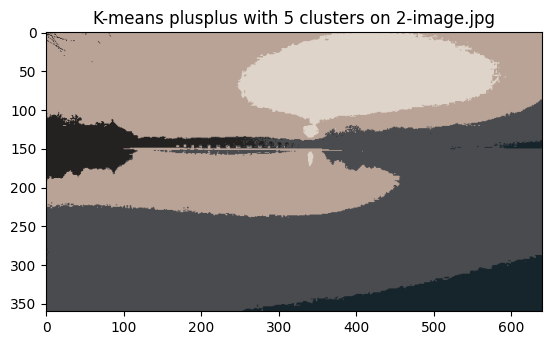

229760
102100
2560
41319
230399
9612
229760
102100


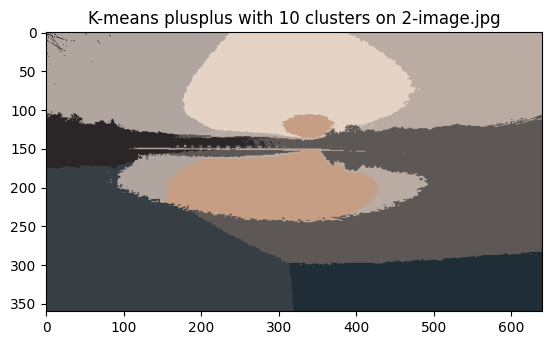

2560
102100
230399
9612
230399
9612
230399
102100
2560
102100
230399
2560
9612


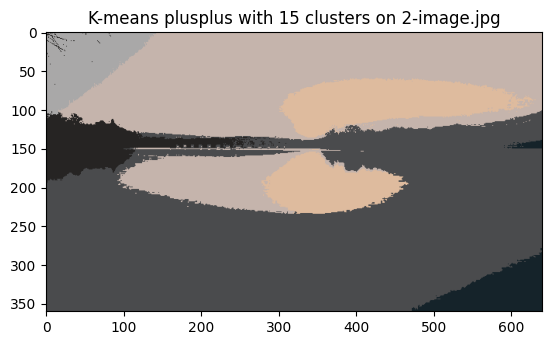

13902
97657
13902


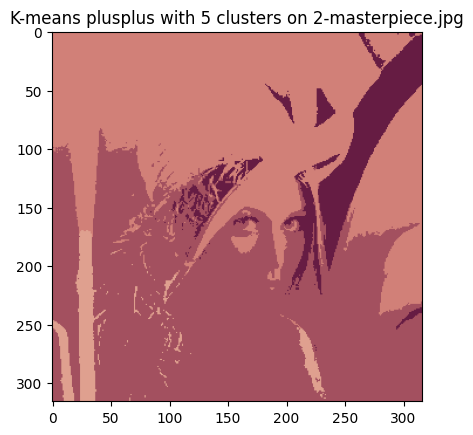

13902
97657
23955
90695
1894
12599
99540
23955


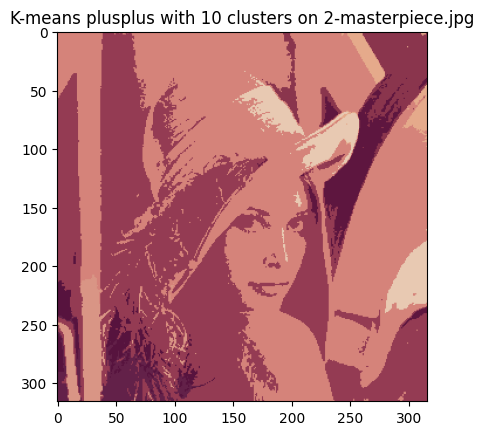

17881
86901
254
90695
12599
13902
97657
13902
97657
1894
53160
99540
23955


/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_13317/1243102385.py:88: RuntimeWarning: invalid value encountered in divide
  average_color[c,:] /= float(cluster_count[c])


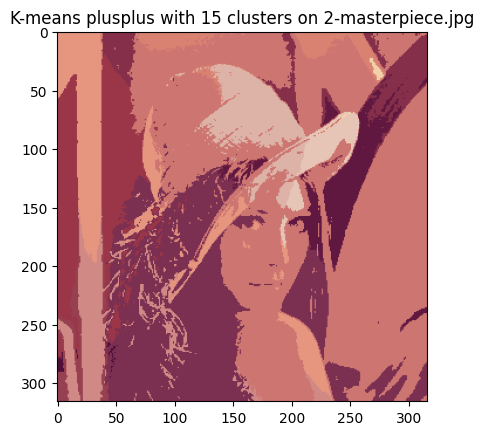

In [ ]:
def kmeans_plusplus_segmentation(im, features, num_clusters):

    #initialization
    times=0
    h,w,_ = im.shape
    pixel_clusters = np.zeros((h*w),dtype=int)
    M  = features.shape[0]
    
    tmp_nc = 2 
    dis_num=[] 
    num_tmp=0 # 計算過後的值
    dis_tmp=0 #  儲存暫時
    times=0

    # randomly choose
    idx_random = np.random.choice(M, num_clusters, replace=False) 

    centroids = features[idx_random[:2]]
    # print(centroids)

    new_centriods = np.zeros_like(centroids)

    # 找群中心
    while tmp_nc <= num_clusters-1:
        dis_tmp=0
        # num_tmp=0
        dis_num=0
        times=0
        for k in range(features.shape[0]):#features.shape[0]
            dis_num = np.sqrt((features[k] - centroids)**2)
            # print(dis_num)
            for j in range(tmp_nc):
                for i in range(5):
                    num_tmp += dis_num[j][i]
            
            if num_tmp > dis_tmp:
                dis_tmp = num_tmp
                times = k
                # print(num_tmp)
            num_tmp=0
        print(times) # 找到第二個之後第三個點最遠在哪
        # print(features[times])
        # print(centroids)
        centroids = np.append(centroids,features[times])
        centroids = centroids.reshape((tmp_nc+1,5))
        tmp_nc+=1
    
    # print(centroids)

    # while True:
    for i in range(features.shape[0]):
        idx = np.argsort(np.linalg.norm(features[i] - centroids,axis=1)) #new_centriods
        pixel_clusters[i] = idx[0]
        # for j in range(tmp_nc):
        #     candidate = np.where(pixel_clusters == j)[0]
        #     new_centriods[j] = np.sum(features[candidate],axis=0)/candidate.shape[0] #算means 也可以用means
    # print(new_centriods)
    return pixel_clusters.reshape(h,w)
        
        # if np.allclose(new_centriods,centroids) and times >=50: # allclose 至少做超過50次 當中心點都不動時返回 pixel_clusters
        #     print("做了 %d 的次數" %(times))
        #     return pixel_clusters.reshape(h,w)

        # else:
        #     centroids = new_centriods.copy()
        #     times+=1
    
    
"""
平均像素點 同 cluster points 值, output 同樣cluster 時 output 該 cluster 平均像素點
"""

def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im



if __name__ == '__main__':
    num_clusters = [5,10,15]
    for filename in ['2-image','2-masterpiece']:#, '2-masterpiece'
        img = imageio.imread('%s.jpg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part I: Segmentation using K-Means
        for nc in num_clusters:
            clustered_pixels = kmeans_plusplus_segmentation(img, features_normalized, nc)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)
            

            imageio.imsave('output/K-means_plusplus_with_%d_clusters_on_%s.jpg' % (int(nc), filename),cluster_im)
            # imageio.imsave('2/output/clusters_on.jpg',cluster_im)
            plt.imshow(cluster_im)
            plt.title('K-means plusplus with %d clusters on %s.jpg' % (int(nc), filename))
            plt.show()


## meanshift

/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_22593/3560259702.py:163: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)
/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_22593/3560259702.py:60: RuntimeWarning: invalid value encountered in divide
  average_color[c,:] /= float(cluster_count[c])


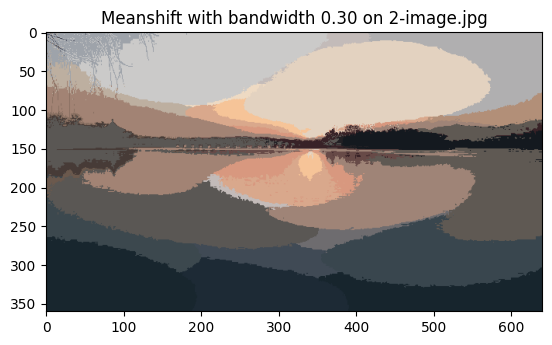

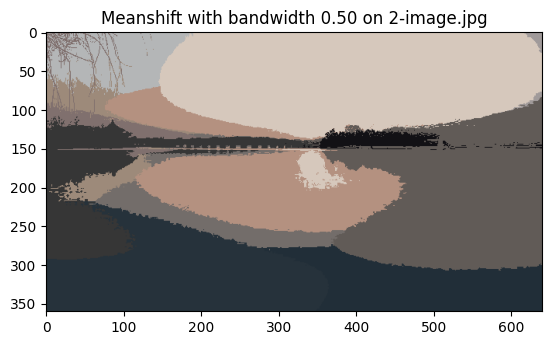

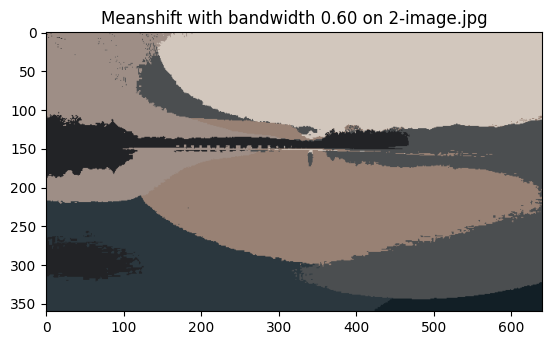

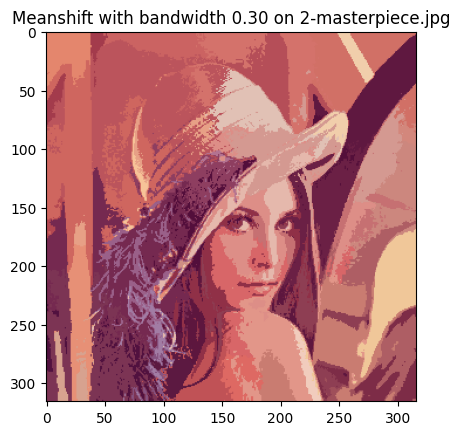

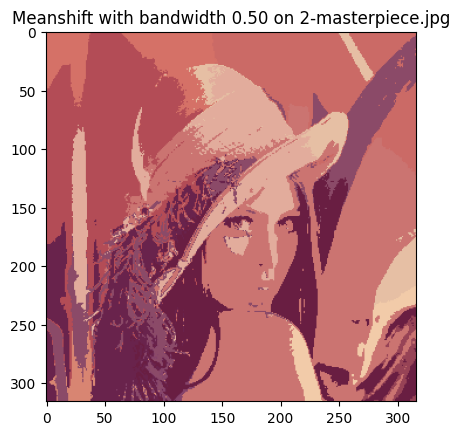

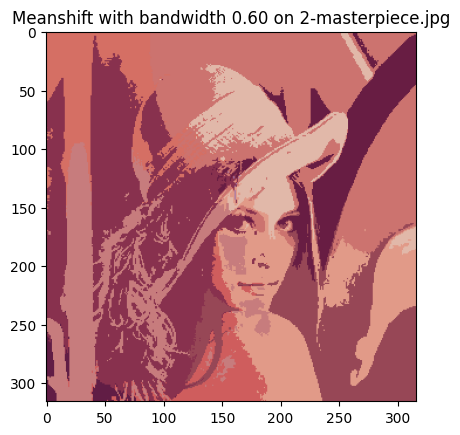

original: 2-image.jpg


/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_22593/3560259702.py:189: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_1 = imageio.imread('%s.jpg' % filename)


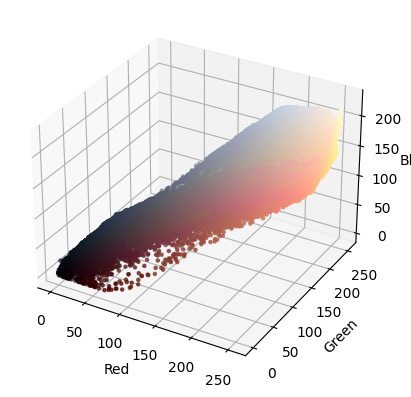

/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_22593/3560259702.py:192: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('output/Meanshift_with_bandwidth_%.2f_on_%s.jpg' % (bandwidth,filename))


Meanshift with bandwidth 0.30 on 2-image.jpg


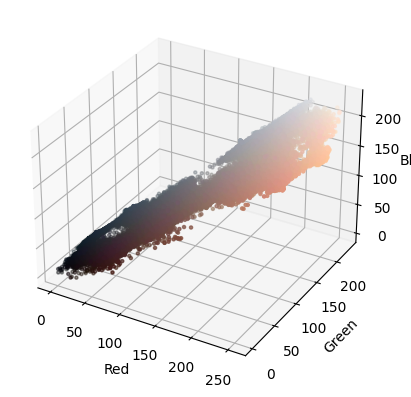

Meanshift with bandwidth 0.50 on 2-image.jpg


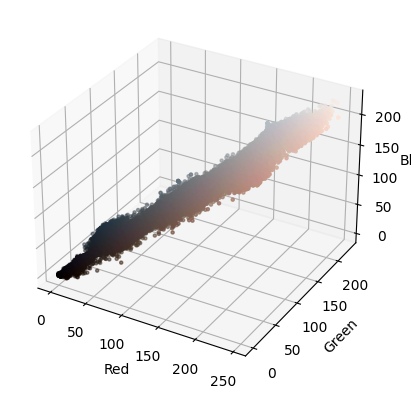

Meanshift with bandwidth 0.60 on 2-image.jpg


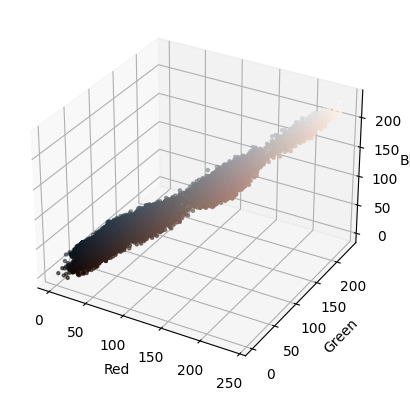

original: 2-masterpiece.jpg


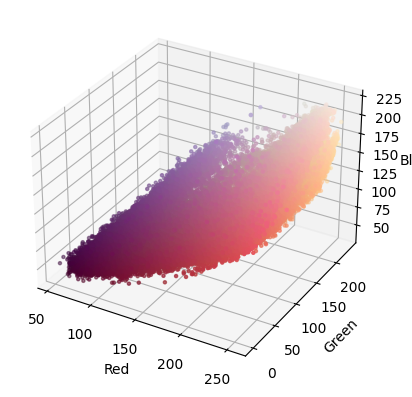

Meanshift with bandwidth 0.30 on 2-masterpiece.jpg


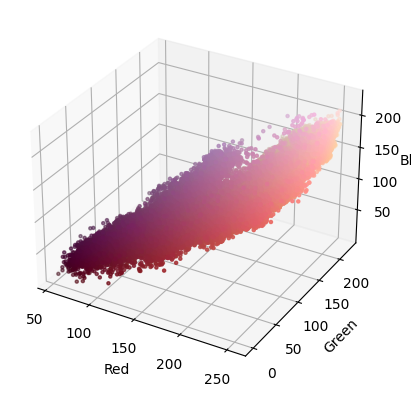

Meanshift with bandwidth 0.50 on 2-masterpiece.jpg


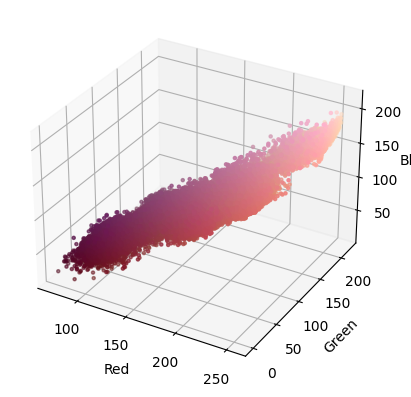

Meanshift with bandwidth 0.60 on 2-masterpiece.jpg


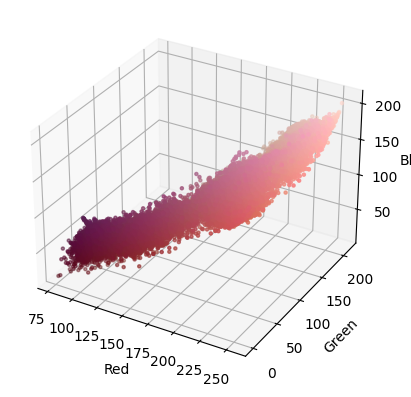

In [84]:

'''
MEANSHIFT_SEGMENTATION: Image segmentation using meanshift
Arguments:
    im - the image being segmented, given as a (H, W, 3) ndarray

    features - ndarray of size (#pixels, M) that are the feature vectors
        associated with each pixel. The #pixels are arranged in such a way
        that calling reshape((H,W)) will correspond to the image im.

    bandwidth - A parameter that determines the radius of what participates
       in the mean computation

Returns:
    pixel_clusters - H by W matrix where each index tells what 
    "cluster the pixel belongs to". 
    The clusters must range from 0 to N-1, where N is the total number of clusters.

The meanshift algorithm can be done in the following steps:
(1) Keep track of an array whether we have seen each pixel or not.
Initialize it such that we haven't seen any.
(2) While there are still pixels we haven't seen do the following:
    - Pick a random pixel we haven't seen
    - Until convergence (mean is within 1 of the bandwidth of the old
        mean), mean shift. 
        The output of this step will be a mean vector.
        For each iteration of the meanshift, if another pixel is within the
        bandwidth circle (in feature space), then that pixel should also be
        marked as seen
    - 
    - 
(3) After finding all clusters, assign every pixel to the nearest cluster
in feature space.

To perform mean shift:
    - Once a random pixel has been selected, pretend it is the current mean
        vector.
    - Find the feature vectors of the other pixels that are within the
        bandwidth distance from the mean feature vector according to EUCLIDEAN
        distance (in feature space).
    - Compute the mean feature vector among all feature vectors within the
        bandwidth.
    - Repeat until convergence, using the newly computed mean feature vector
        as the current mean feature vector.
'''
def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im
def meanshift_segmentation(im, features, bandwidth):
    
    #initialization
    h,w,_ = im.shape
    record = np.ones([h*w],dtype=int)
    cluster_means = np.empty((0,features.shape[1]))
    pixel_clusters = np.zeros(features.shape[0],dtype=int)
    
    idx_rand_no_seen_record = []
    idx_i = 0
    timer=0

    while np.sum(record) > 0:
        
        # randomly choose one feature from haven't seen
        idx = np.where(record > 0)[0]
        # print(idx)
        idx_rand_no_seen = idx[np.random.choice(idx.shape[0], 1)]

        # print(idx_rand_no_seen) # 找一些點大概不到 50點 就可以收斂

        mean = features[idx_rand_no_seen].flatten()# flatten() 少一維度 
        # print(mean) 
        flag = True
        
        # mean shift
        while flag:
            dis = np.linalg.norm(features - mean,axis=1)
            idx_within = np.where(dis < bandwidth)[0] # 返回 index

            # import pdb;pdb.set_trace()
            new_mean = np.sum(features[idx_within],axis=0) / idx_within.shape[0]
        #     If the output mean vector from the mean shift step is
        #       sufficiently close (within half a bandwidth) to another cluster
        #       center, say it's part of that cluster
            if np.linalg.norm(new_mean-mean) < bandwidth:  #norm 相減 平方 sum 再開根號
                flag = False
                # idx_i+=1
                # print(timer)
                # timer+=1
            else:
                # If it's not sufficiently close to any other cluster center, make a new cluster
                mean = new_mean.copy()
                # print("bad")
            record[idx_within] = 0
            
        mean_dis = np.linalg.norm(cluster_means - new_mean,axis=1)

        # 每一個 cluster_means 隨著找到的 idx_rand_no_seen 的點 當成 cluster 的 中心算 mean 
        # print(mean_dis)

        """
        把 h 範圍內 點都統一 ,且算完的值 給 mean_dis
        取 最小 mean_dis[0] ,找真正有用的cluster
        """
        if mean_dis.size > 0 and mean_dis[np.argsort(mean_dis)[0]] < bandwidth / 2:
            # pixel_clusters[idx_within] = mean_dis[np.argsort(mean_dis)[0]] # 是給 index
            pixel_clusters[idx_within] = np.argsort(mean_dis)[0]
            # print(pixel_clusters[idx_within])
            # print(np.argsort(mean_dis)[0])
            # print(timer)# 3次
            # timer+=1
        else:
            cluster_means = np.vstack((cluster_means,new_mean)) # 矩陣矩陣堆疊 直方向 
            # print(timer)# 29次
            # timer+=1

            # idx_within 的值 = 總共數量的值 ,全部該次的idx_within 都同個id 然後給 plot 再算idx_within 全部的平均
            pixel_clusters[idx_within] = cluster_means.shape[0] 
    # print(cluster_means.shape[0])
    # print(idx_rand_no_seen_record)
    
    return pixel_clusters.reshape(h,w)
    
def show_rgbspace(img):
    r, g, b = cv2.split(img)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()

if __name__ == '__main__':

    # Change these parameters Meanshift
    bandwidths = [0.3,0.5,0.6]

    for filename in ['2-image', '2-masterpiece']:#, '2-masterpiece'
        img = imageio.imread('%s.jpg' % filename)
        # img = imread('data/%s.jpeg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part II: Segmentation using Meanshift
        for bandwidth in bandwidths:

            clustered_pixels = meanshift_segmentation(img, features_normalized, bandwidth)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)

            # for i in range(3):
            imageio.imsave('output/Meanshift_with_bandwidth_%.2f_on_%s.jpg' % (bandwidth,filename),cluster_im)
            plt.imshow(cluster_im)
            plt.title('Meanshift with bandwidth %.2f on %s.jpg' % (bandwidth, filename))
            plt.show()

# show original

for filename in ['2-image', '2-masterpiece']:#, '2-masterpiece'
    print("original: %s.jpg" % filename)
    img_1 = imageio.imread('%s.jpg' % filename)
    show_rgbspace(img_1)
    for bandwidth in bandwidths:
        img = imageio.imread('output/Meanshift_with_bandwidth_%.2f_on_%s.jpg' % (bandwidth,filename))
        

        
        print('Meanshift with bandwidth %.2f on %s.jpg' % (bandwidth, filename))
        show_rgbspace(img)

# img = imageio.imread('2-image.jpg')
# show_rgbspace(img)

In [ ]:
# def draw_clusters_on_image(im, pixel_clusters):
#     num_clusters = int(pixel_clusters.max()) + 1
    
#     average_color = np.zeros((num_clusters, 3))
    
#     cluster_count = np.zeros(num_clusters)

#     for i in range(im.shape[0]):
#         for j in range(im.shape[1]):
#             c = pixel_clusters[i,j]
#             cluster_count[c] += 1

#             average_color[c, :] += im[i, j, :]

#     for c in range(num_clusters):
#         average_color[c,:] /= float(cluster_count[c])

#     out_im = np.zeros_like(im)
#     for i in range(im.shape[0]):
#         for j in range(im.shape[1]):
#             c = pixel_clusters[i,j]
#             out_im[i,j,:] = average_color[c,:]

#     return out_im

# def show_rgbspace(img):
#     r, g, b = cv2.split(img)
#     fig = plt.figure()
#     axis = fig.add_subplot(1, 1, 1, projection="3d")
#     pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
#     norm = colors.Normalize(vmin=-1.,vmax=1.)
#     norm.autoscale(pixel_colors)
#     pixel_colors = norm(pixel_colors).tolist()
#     axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
#     axis.set_xlabel("Red")
#     axis.set_ylabel("Green")
#     axis.set_zlabel("Blue")
#     plt.show()






## 比較 cost k-means 與 meanshift

In [8]:
def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im
def meanshift_segmentation(im, features, bandwidth):
    
    #initialization
    h,w,_ = im.shape
    record = np.ones([h*w],dtype=int)
    cluster_means = np.empty((0,features.shape[1]))
    pixel_clusters = np.zeros(features.shape[0],dtype=int)
    
    idx_rand_no_seen_record = []
    idx_i = 0
    timer=0

    while np.sum(record) > 0:
        
        # randomly choose one feature from haven't seen
        idx = np.where(record > 0)[0]
        idx_rand_no_seen = idx[np.random.choice(idx.shape[0], 1)]
        mean = features[idx_rand_no_seen].flatten()# flatten() 少一維度 
        flag = True
        # mean shift
        while flag:
            dis = np.linalg.norm(features - mean,axis=1)
            idx_within = np.where(dis < bandwidth)[0] # 返回 index
            new_mean = np.sum(features[idx_within],axis=0) / idx_within.shape[0]

            if np.linalg.norm(new_mean-mean) < bandwidth:  #norm 相減 平方 sum 再開根號
                flag = False
            else:
                mean = new_mean.copy()
            record[idx_within] = 0
            
        mean_dis = np.linalg.norm(cluster_means - new_mean,axis=1)
        if mean_dis.size > 0 and mean_dis[np.argsort(mean_dis)[0]] < bandwidth / 2:
            pixel_clusters[idx_within] = np.argsort(mean_dis)[0]

        else:
            cluster_means = np.vstack((cluster_means,new_mean)) # 矩陣矩陣堆疊 直方向 
            pixel_clusters[idx_within] = cluster_means.shape[0] 
    return pixel_clusters.reshape(h,w)

if __name__ == '__main__':

    # Change these parameters Meanshift
    bandwidths = [0.3]

    for filename in ['2-image', '2-masterpiece']:#, '2-masterpiece'
        img = imageio.imread('%s.jpg' % filename)
        # img = imread('data/%s.jpeg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part II: Segmentation using Meanshift
        for bandwidth in bandwidths:

            clustered_pixels = meanshift_segmentation(img, features_normalized, bandwidth)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)
            # imageio.imsave('output/Meanshift_with_bandwidth_%.2f_on_%s.jpg' % (bandwidth,filename),cluster_im)


/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_26503/1291948495.py:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)
/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_26503/1291948495.py:16: RuntimeWarning: invalid value encountered in divide
  average_color[c,:] /= float(cluster_count[c])


In [10]:
def kmeans_segmentation(im, features, num_clusters):

    #initialization
    times=0
    h,w,_ = im.shape
    pixel_clusters = np.zeros((h*w),dtype=int)
    M  = features.shape[0]

    # randomly choose
    idx_random = np.random.choice(M, num_clusters, replace=False) 
    centroids = features[idx_random]
    

    new_centriods = np.zeros_like(centroids)
    while True:
        # 
        for i in range(features.shape[0]):
            idx = np.argsort(np.linalg.norm(features[i] - centroids,axis=1)) #new_centriods
            pixel_clusters[i] = idx[0]

        for j in range(num_clusters):
           
            candidate = np.where(pixel_clusters == j)[0]
            # print(candidate)
            # print(j)
            new_centriods[j] = np.sum(features[candidate],axis=0)/candidate.shape[0] #算means 也可以用means
            # print(new_centriods[j])
            # print(j)
        
        # print(candidate)
        # print(candidate.shape)

        
        if np.allclose(new_centriods,centroids) and times >=50: # allclose 至少做超過50次 當中心點都不動時返回 pixel_clusters
            print("做了 %d 的次數" %(times))
            return pixel_clusters.reshape(h,w)

        else:
            centroids = new_centriods.copy()
            times+=1
    
def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im

if __name__ == '__main__':
    num_clusters = [5]
    for filename in ['2-image', '2-masterpiece']:
        img = imageio.imread('%s.jpg' % filename)
        # img = imread('data/%s.jpeg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part I: Segmentation using K-Means
        for nc in num_clusters:
            clustered_pixels = kmeans_segmentation(img, features_normalized, nc)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)
            

            # imageio.imsave('output/K-means_with_%d_clusters_on_%s.jpg' % (int(nc), filename),cluster_im)
            # plt.imshow(cluster_im)
            # plt.title('K-means with %d clusters on %s.jpg' % (int(nc), filename))
            # plt.show()


/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_26503/1121095173.py:70: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)


做了 70 的次數
做了 60 的次數
